# Header

# Webscraper for Historical and Current Games


Basic installing of packages for the selenium webdriver.

In [ ]:
# Google Colab setup for Selenium + Headless Chrome
!apt-get update -qq
!apt install -y chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install -q selenium


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  apparmor chromium-browser libfuse3-3 libudev1 snapd squashfs-tools
  systemd-hwe-hwdb udev
Suggested packages:
  apparmor-profiles-extra apparmor-utils fuse3 zenity | kdialog
The following NEW packages will be installed:
  apparmor chromium-browser chromium-chromedriver libfuse3-3 snapd
  squashfs-tools systemd-hwe-hwdb udev
The following packages will be upgraded:
  libudev1
1 upgraded, 8 newly installed, 0 to remove and 37 not upgraded.
Need to get 30.3 MB of archives.
After this operation, 123 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 apparmor amd64 3.0.4-2ubuntu2.4 [598 kB]
Get:2 http

This is the webscraper that gets the basic data from barttorvik and puts it into two seperate csv files.

In [ ]:
import time
import io
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Historical URLs (2023-2024)
historical_urls = [
    "https://barttorvik.com/gamestat.php?sIndex=0&year=2024&tvalue=All&cvalue=All&opcvalue=All&ovalue=All&minwin=All&mindate=&maxdate=&typev=All&venvalue=All&minadjo=0&minadjd=200&mintempo=0&minppp=0&minefg=0&mintov=200&minreb=0&minftr=0&minpppd=200&minefgd=200&mintovd=0&minrebd=200&minftrd=200&mings=0&mingscript=-100&maxx=2500&coach=All&opcoach=All&adjoSelect=min&adjdSelect=max&tempoSelect=min&pppSelect=min&efgSelect=min&tovSelect=max&rebSelect=min&ftrSelect=min&pppdSelect=max&efgdSelect=max&tovdSelect=min&rebdSelect=max&ftrdSelect=max&gscriptSelect=min&sortToggle=0&quad=1",
    "https://barttorvik.com/gamestat.php?sIndex=0&year=2024&tvalue=All&cvalue=All&opcvalue=All&ovalue=All&minwin=All&mindate=&maxdate=&typev=All&venvalue=All&minadjo=0&minadjd=200&mintempo=0&minppp=0&minefg=0&mintov=200&minreb=0&minftr=0&minpppd=200&minefgd=200&mintovd=0&minrebd=200&minftrd=200&mings=0&mingscript=-100&maxx=2500&coach=All&opcoach=All&adjoSelect=min&adjdSelect=max&tempoSelect=min&pppSelect=min&efgSelect=min&tovSelect=max&rebSelect=min&ftrSelect=min&pppdSelect=max&efgdSelect=max&tovdSelect=min&rebdSelect=max&ftrdSelect=max&gscriptSelect=min&sortToggle=1&quad=2",
    "https://barttorvik.com/gamestat.php?sIndex=0&year=2024&tvalue=All&cvalue=All&opcvalue=All&ovalue=All&minwin=All&mindate=&maxdate=&typev=All&venvalue=All&minadjo=0&minadjd=200&mintempo=0&minppp=0&minefg=0&mintov=200&minreb=0&minftr=0&minpppd=200&minefgd=200&mintovd=0&minrebd=200&minftrd=200&mings=0&mingscript=-100&maxx=2500&coach=All&opcoach=All&adjoSelect=min&adjdSelect=max&tempoSelect=min&pppSelect=min&efgSelect=min&tovSelect=max&rebSelect=min&ftrSelect=min&pppdSelect=max&efgdSelect=max&tovdSelect=min&rebdSelect=max&ftrdSelect=max&gscriptSelect=min&sortToggle=1&quad=3",
    "https://barttorvik.com/gamestat.php?sIndex=0&year=2024&tvalue=All&cvalue=All&opcvalue=All&ovalue=All&minwin=All&mindate=&maxdate=&typev=All&venvalue=All&minadjo=0&minadjd=200&mintempo=0&minppp=0&minefg=0&mintov=200&minreb=0&minftr=0&minpppd=200&minefgd=200&mintovd=0&minrebd=200&minftrd=200&mings=0&mingscript=-100&maxx=2500&coach=All&opcoach=All&adjoSelect=min&adjdSelect=max&tempoSelect=min&pppSelect=min&efgSelect=min&tovSelect=max&rebSelect=min&ftrSelect=min&pppdSelect=max&efgdSelect=max&tovdSelect=min&rebdSelect=max&ftrdSelect=max&gscriptSelect=min&sortToggle=1",
    "https://barttorvik.com/gamestat.php?sIndex=7&year=2023&tvalue=All&cvalue=All&opcvalue=All&ovalue=All&minwin=All&mindate=&maxdate=&typev=All&venvalue=All&minadjo=0&minadjd=200&mintempo=0&minppp=0&minefg=0&mintov=200&minreb=0&minftr=0&minpppd=200&minefgd=200&mintovd=0&minrebd=200&minftrd=200&mings=0&mingscript=-100&maxx=100&coach=All&opcoach=All&adjoSelect=min&adjdSelect=max&tempoSelect=min&pppSelect=min&efgSelect=min&tovSelect=max&rebSelect=min&ftrSelect=min&pppdSelect=max&efgdSelect=max&tovdSelect=min&rebdSelect=max&ftrdSelect=max&gscriptSelect=min&sortToggle=1&quad=1",
    "https://barttorvik.com/gamestat.php?sIndex=7&year=2023&tvalue=All&cvalue=All&opcvalue=All&ovalue=All&minwin=All&mindate=&maxdate=&typev=All&venvalue=All&minadjo=0&minadjd=200&mintempo=0&minppp=0&minefg=0&mintov=200&minreb=0&minftr=0&minpppd=200&minefgd=200&mintovd=0&minrebd=200&minftrd=200&mings=0&mingscript=-100&maxx=100&coach=All&opcoach=All&adjoSelect=min&adjdSelect=max&tempoSelect=min&pppSelect=min&efgSelect=min&tovSelect=max&rebSelect=min&ftrSelect=min&pppdSelect=max&efgdSelect=max&tovdSelect=min&rebdSelect=max&ftrdSelect=max&gscriptSelect=min&sortToggle=1&quad=2",
    "https://barttorvik.com/gamestat.php?sIndex=7&year=2023&tvalue=All&cvalue=All&opcvalue=All&ovalue=All&minwin=All&mindate=&maxdate=&typev=All&venvalue=All&minadjo=0&minadjd=200&mintempo=0&minppp=0&minefg=0&mintov=200&minreb=0&minftr=0&minpppd=200&minefgd=200&mintovd=0&minrebd=200&minftrd=200&mings=0&mingscript=-100&maxx=100&coach=All&opcoach=All&adjoSelect=min&adjdSelect=max&tempoSelect=min&pppSelect=min&efgSelect=min&tovSelect=max&rebSelect=min&ftrSelect=min&pppdSelect=max&efgdSelect=max&tovdSelect=min&rebdSelect=max&ftrdSelect=max&gscriptSelect=min&sortToggle=1&quad=3",
    "https://barttorvik.com/gamestat.php?sIndex=7&year=2023&tvalue=All&cvalue=All&opcvalue=All&ovalue=All&minwin=All&mindate=&maxdate=&typev=All&venvalue=All&minadjo=0&minadjd=200&mintempo=0&minppp=0&minefg=0&mintov=200&minreb=0&minftr=0&minpppd=200&minefgd=200&mintovd=0&minrebd=200&minftrd=200&mings=0&mingscript=-100&maxx=100&coach=All&opcoach=All&adjoSelect=min&adjdSelect=max&tempoSelect=min&pppSelect=min&efgSelect=min&tovSelect=max&rebSelect=min&ftrSelect=min&pppdSelect=max&efgdSelect=max&tovdSelect=min&rebdSelect=max&ftrdSelect=max&gscriptSelect=min&sortToggle=1",
]

# 2025 URLs
current_urls = [
    "https://barttorvik.com/gamestat.php?sIndex=7&year=2025&tvalue=All&cvalue=All&opcvalue=All&ovalue=All&minwin=All&mindate=&maxdate=&typev=All&venvalue=All&minadjo=0&minadjd=200&mintempo=0&minppp=0&minefg=0&mintov=200&minreb=0&minftr=0&minpppd=200&minefgd=200&mintovd=0&minrebd=200&minftrd=200&mings=0&mingscript=-100&maxx=100&coach=All&opcoach=All&adjoSelect=min&adjdSelect=max&tempoSelect=min&pppSelect=min&efgSelect=min&tovSelect=max&rebSelect=min&ftrSelect=min&pppdSelect=max&efgdSelect=max&tovdSelect=min&rebdSelect=max&ftrdSelect=max&gscriptSelect=min&sortToggle=1",
    "https://barttorvik.com/gamestat.php?sIndex=7&year=2025&tvalue=All&cvalue=All&opcvalue=All&ovalue=All&minwin=All&mindate=&maxdate=&typev=All&venvalue=All&minadjo=0&minadjd=200&mintempo=0&minppp=0&minefg=0&mintov=200&minreb=0&minftr=0&minpppd=200&minefgd=200&mintovd=0&minrebd=200&minftrd=200&mings=0&mingscript=-100&maxx=100&coach=All&opcoach=All&adjoSelect=min&adjdSelect=max&tempoSelect=min&pppSelect=min&efgSelect=min&tovSelect=max&rebSelect=min&ftrSelect=min&pppdSelect=max&efgdSelect=max&tovdSelect=min&rebdSelect=max&ftrdSelect=max&gscriptSelect=min&sortToggle=1&quad=3",
    "https://barttorvik.com/gamestat.php?sIndex=7&year=2025&tvalue=All&cvalue=All&opcvalue=All&ovalue=All&minwin=All&mindate=&maxdate=&typev=All&venvalue=All&minadjo=0&minadjd=200&mintempo=0&minppp=0&minefg=0&mintov=200&minreb=0&minftr=0&minpppd=200&minefgd=200&mintovd=0&minrebd=200&minftrd=200&mings=0&mingscript=-100&maxx=100&coach=All&opcoach=All&adjoSelect=min&adjdSelect=max&tempoSelect=min&pppSelect=min&efgSelect=min&tovSelect=max&rebSelect=min&ftrSelect=min&pppdSelect=max&efgdSelect=max&tovdSelect=min&rebdSelect=max&ftrdSelect=max&gscriptSelect=min&sortToggle=1&quad=2",
    "https://barttorvik.com/gamestat.php?sIndex=7&year=2025&tvalue=All&cvalue=All&opcvalue=All&ovalue=All&minwin=All&mindate=&maxdate=&typev=All&venvalue=All&minadjo=0&minadjd=200&mintempo=0&minppp=0&minefg=0&mintov=200&minreb=0&minftr=0&minpppd=200&minefgd=200&mintovd=0&minrebd=200&minftrd=200&mings=0&mingscript=-100&maxx=100&coach=All&opcoach=All&adjoSelect=min&adjdSelect=max&tempoSelect=min&pppSelect=min&efgSelect=min&tovSelect=max&rebSelect=min&ftrSelect=min&pppdSelect=max&efgdSelect=max&tovdSelect=min&rebdSelect=max&ftrdSelect=max&gscriptSelect=min&sortToggle=1&quad=1",
]

# Function to scrape game data from BartTorvik.com
def scrape_urls(urls, output_filename):
    dfs_all = []

    chrome_options = Options()
    chrome_options.add_argument("--headless")
    chrome_options.add_argument("--no-sandbox")
    chrome_options.add_argument("--disable-dev-shm-usage")
    driver = webdriver.Chrome(options=chrome_options)

    for url in urls:
        print(f"Scraping: {url}")
        driver.get(url)
        time.sleep(5)
        html = driver.page_source
        soup = BeautifulSoup(html, "html.parser")
        tables = soup.find_all("table")
        print(f"  Found {len(tables)} table(s).")

        if len(tables) >= 2:
            tbl_html = str(tables[1])
            df_list = pd.read_html(io.StringIO(tbl_html))
            if df_list:
                df_second = df_list[0]
                dfs_all.append(df_second)
                print(f"  Successfully parsed the second table (shape: {df_second.shape})")
            else:
                print("  Could not parse the second table with pd.read_html.")
        else:
            print("  There's no second table on this page.")

    driver.quit()

    if dfs_all:
        df_combined = pd.concat(dfs_all, ignore_index=True)
        df_combined.to_csv(output_filename, index=False)
        print(f"\nSaved all second tables to '{output_filename}' (total rows: {len(df_combined)})")
        return df_combined
    else:
        print(f"\nNo data frames were found; no CSV file was created for {output_filename}.")
        return None

# Run the scrapers
print("\n=== SCRAPING HISTORICAL DATA (2023-2024) ===")
historical_df = scrape_urls(historical_urls, "historical_games.csv")

print("\n=== SCRAPING CURRENT SEASON DATA (2025) ===")
current_df = scrape_urls(current_urls, "2025_games.csv")



=== SCRAPING HISTORICAL DATA (2023-2024) ===
Scraping: https://barttorvik.com/gamestat.php?sIndex=0&year=2024&tvalue=All&cvalue=All&opcvalue=All&ovalue=All&minwin=All&mindate=&maxdate=&typev=All&venvalue=All&minadjo=0&minadjd=200&mintempo=0&minppp=0&minefg=0&mintov=200&minreb=0&minftr=0&minpppd=200&minefgd=200&mintovd=0&minrebd=200&minftrd=200&mings=0&mingscript=-100&maxx=2500&coach=All&opcoach=All&adjoSelect=min&adjdSelect=max&tempoSelect=min&pppSelect=min&efgSelect=min&tovSelect=max&rebSelect=min&ftrSelect=min&pppdSelect=max&efgdSelect=max&tovdSelect=min&rebdSelect=max&ftrdSelect=max&gscriptSelect=min&sortToggle=0&quad=1
  Found 2 table(s).
  Successfully parsed the second table (shape: (1945, 25))
Scraping: https://barttorvik.com/gamestat.php?sIndex=0&year=2024&tvalue=All&cvalue=All&opcvalue=All&ovalue=All&minwin=All&mindate=&maxdate=&typev=All&venvalue=All&minadjo=0&minadjd=200&mintempo=0&minppp=0&minefg=0&mintov=200&minreb=0&minftr=0&minpppd=200&minefgd=200&mintovd=0&minrebd=200&

# Add Home Court Advantage Into Dataset


In [ ]:
historical_df = pd.read_csv("historical_games.csv")
current_df = pd.read_csv("2025_games.csv")
url="https://www.boydsbets.com/college-basketball-home-court-advantage/"
def scrape_home_court_advantage():
  chrome_options = Options()
  chrome_options.add_argument("--headless")
  chrome_options.add_argument("--no-sandbox")
  chrome_options.add_argument("--disable-dev-shm-usage")
  driver = webdriver.Chrome(options=chrome_options)
  print(f"Scraping: {url}")
  driver.get(url)
  time.sleep(3)
  html = driver.page_source
  soup = BeautifulSoup(html, "html.parser")
  tables = soup.find_all("table")
  print(f"  Found {len(tables)} table(s).")
  table=str(tables[0])

  homecourt_ad_df = pd.read_html(io.StringIO(table))[0]
  homecourt_ad_df.dropna(inplace=True)
  homecourt_ad_df.to_csv("homecourt_advantage.csv", index=False)
  driver.quit()
  return homecourt_ad_df

temp_hc_ad_df=scrape_home_court_advantage()


Scraping: https://www.boydsbets.com/college-basketball-home-court-advantage/
  Found 1 table(s).


We now have 3 data frames that need to be put together and cleaned. We will focus on historical data for the statistical analysis portion then leave the current year games for our testing data of our machine learning model.

# Basic Data Cleaning

Making the columns of our historical dataframe correct and dropping some uncessisary columns and rows.

In [ ]:
historical_df.columns = historical_df.iloc[0]
historical_df.drop(historical_df.head(1).index,inplace=True)
historical_df.drop(historical_df.tail(1).index,inplace=True)
historical_df.drop(historical_df.columns[-1],inplace=True,axis=1)
historical_df.drop(historical_df.columns[0],inplace=True, axis=1)

Merging in the home court advantage. Alot of the names between the two dataframes need to be slightly adjusted for the merge to work. Then any NaN values that are still not there will just be dropped from the DataFrame.

In [ ]:
import numpy as np


name_changes={
    "NC State": "N.C. State",
    "Indiana St": "Indiana St.",
    "San Diego St": "San Diego St.",
    "Mississippi St": "Mississippi St.",
    "North Carolina St": "North Carolina St.",
    "Penn St": "Penn St.",
    "Ohio St": "Ohio St.",
    "Ohio State": "Ohio St.",
    "Iowa St": "Iowa St.",
    "Boise St": "Boise St.",
    "Fresno St": "Fresno St.",
    "Arizona St": "Arizona St.",
    "Texas AM": "Texas A&M",
    "Utah St": "Utah St.",
    "Texas St": "Texas St.",
    "Michigan St": "Michigan St.",
    "Washington St": "Washington St.",
    "Kansas St": "Kansas St.",
    "Miami Florida": "Miami FL",
    "Texas Christian": "TCU",
    "Northwestern St": "Northwestern St.",
    "McNeese St": "McNeese St.",
    "Morehead St": "Morehead St.",
    "Wisconsin St": "Wisconsin St.",
    "South Dakota State": "South Dakota St.",
    "Colorado St": "Colorado St.",
    "Long Beach St": "Long Beach St.",
    "Brigham Young": "BYU",
    "Florida St": "Florida St.",
    "Louisiana State": "LSU",
    "Southern California": "USC",
    "Central Florida": "UCF",
    "Louisiana Tech": "UT",
    "Missouri St": "Missouri St.",
    "Alabama St": "Alabama St.",
    "Oklahoma St": "Oklahoma St.",
    "Citadel": "The Citadel",
    "Arkansas St": "Arkansas St.",
    "Murray St": "Murray St.",
    "Southern Methodist": "SMU",
    "St Johns": "St. John's",
    "San Jose St": "San Jose St.",
    "Pennsylvania": "Penn",
    "St Bonaventure": "St. Bonaventure",
    "Oregon St": "Oregon St.",
    "Wichita St": "Wichita St.",
}

temp_hc_ad_df['Team']=temp_hc_ad_df['Team'].replace(name_changes)
historical_df = historical_df.merge(temp_hc_ad_df[['Team','True Advantage']], on='Team', how='left')
nan_rows = historical_df[historical_df['True Advantage'].isna()]
historical_df.dropna(subset=['True Advantage'],inplace=True)


display(historical_df)

,Rk,Date,Type,Team,Conf.,Opp.,Venue,Result,Adj. O,Adj. D,...,Reb%,FTR,EFF,eFG%,TO%,Reb%,FTR,G-Sc,+/-,True Advantage
0,1,4/8/24,T,Connecticut,BE,Purdue,N,"W, 75-60",135,83.5,...,42.4,17.7,98.1,45.4,14.7,30,27.8,99.6,7,3.86
1,2,4/8/24,T,Purdue,B10,Connecticut,N,"L, 75-60",115.3,99.6,...,30,27.8,122.6,53.2,13.1,42.4,17.7,84.3,-7,4.54
2,3,4/6/24,T,Alabama,SEC,Connecticut,N,"L, 86-72",136.3,109.8,...,24.2,19,136.8,58.1,6.4,36.4,29,92.3,-4,4.86
3,4,4/6/24,T,Connecticut,BE,Alabama,N,"W, 86-72",137.2,98.7,...,36.4,29,114.5,54.3,12.7,24.2,19,97.8,4,3.86
4,5,4/6/24,T,N.C. State,ACC,Purdue,N,"L, 63-50",87,81.8,...,16.7,7,97.9,49.1,24.9,33.3,18.2,66.9,-8,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7345,96,2/23/23,C,Eastern Washington,BSky,Weber St.,A,"W, 89-82",137.8,129.2,...,28.6,43.4,123,52.5,15,37.1,40.7,67.7,2,3.94
7346,97,2/8/23,C,Alabama,SEC,Florida,H,"W, 97-69",137.8,90.9,...,30,20.5,91.5,38.1,13.3,28.3,49.2,99.2,18,4.86
7347,98,11/26/22,N,Boise St.,MWC,Utah Valley,H,"W, 87-69",137.8,99.3,...,31.2,24.6,100.7,48.2,14.6,23.5,35.7,97.7,11,3.59
7348,99,2/2/23,C,Arizona,P12,Oregon,H,"W, 91-76",137.7,99.7,...,34.5,37.9,107.8,48.4,17,30.8,28.6,97.6,11,3.51


Now we have a set of duplicated columns with the first relating to offense statistics and the latter being defensive so let us show reflect this into our dataframe for later use. Additionally, we updated the true advantage column to show 0 unless the venue is Home "H".

In [ ]:
historical_df.columns=['Rk', 'Date', 'Type', 'Team', 'Conf.', 'Opp.', 'Venue', 'Result',
       'Adj. O', 'Adj. D', 'T', 'o_EFF', 'o_eFG%', 'o_TO%', 'o_Reb%', 'o_FTR', 'd_EFF',
       'd_eFG%', 'd_TO%', 'd_Reb%', 'd_FTR', 'G-Sc', '+/-', 'True Advantage']

historical_df.loc[historical_df['Venue'].str.upper() != 'H', 'True Advantage'] = 0


display(historical_df.columns)

Index(['Rk', 'Date', 'Type', 'Team', 'Conf.', 'Opp.', 'Venue', 'Result',
       'Adj. O', 'Adj. D', 'T', 'o_EFF', 'o_eFG%', 'o_TO%', 'o_Reb%', 'o_FTR',
       'd_EFF', 'd_eFG%', 'd_TO%', 'd_Reb%', 'd_FTR', 'G-Sc', '+/-',
       'True Advantage'],
      dtype='object')

Now lets make a score column so the team can have a score instead of just a scorebox.

In [ ]:
historical_df['Won/Loss']=historical_df['Result'].str[0]
temp=historical_df["Result"].str.split(', ', expand=True)
historical_df["Score Range"]=temp[1]
temp2=historical_df["Score Range"].str.split('-', expand=True).astype(int)
def score_fun(row):
  (s1,s2)=row['Score Range'].split('-')
  (s1,s2)=int(s1),int(s2)
  if row['Won/Loss']=='W':
    return max(s1,s2)
  else:
    return min(s1,s2)
def opp_score_fun(row):
  (s1,s2)=row['Score Range'].split('-')
  (s1,s2)=int(s1),int(s2)
  if row['Won/Loss']=='W':
    return min(s1,s2)
  else:
    return max(s1,s2)
historical_df['Score']=historical_df.apply(score_fun,axis=1)
historical_df['Opp_Score']=historical_df.apply(opp_score_fun,axis=1)

display(historical_df)
display(historical_df.columns)
historical_df.to_csv("Cleaned_Historicals.csv",index=False)


,Rk,Date,Type,Team,Conf.,Opp.,Venue,Result,Adj. O,Adj. D,...,d_TO%,d_Reb%,d_FTR,G-Sc,+/-,True Advantage,Won/Loss,Score Range,Score,Opp_Score
0,1,4/8/24,T,Connecticut,BE,Purdue,N,"W, 75-60",135,83.5,...,14.7,30,27.8,99.6,7,0.00,W,75-60,75,60
1,2,4/8/24,T,Purdue,B10,Connecticut,N,"L, 75-60",115.3,99.6,...,13.1,42.4,17.7,84.3,-7,0.00,L,75-60,60,75
2,3,4/6/24,T,Alabama,SEC,Connecticut,N,"L, 86-72",136.3,109.8,...,6.4,36.4,29,92.3,-4,0.00,L,86-72,72,86
3,4,4/6/24,T,Connecticut,BE,Alabama,N,"W, 86-72",137.2,98.7,...,12.7,24.2,19,97.8,4,0.00,W,86-72,86,72
4,5,4/6/24,T,N.C. State,ACC,Purdue,N,"L, 63-50",87,81.8,...,24.9,33.3,18.2,66.9,-8,0.00,L,63-50,50,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7345,96,2/23/23,C,Eastern Washington,BSky,Weber St.,A,"W, 89-82",137.8,129.2,...,15,37.1,40.7,67.7,2,0.00,W,89-82,89,82
7346,97,2/8/23,C,Alabama,SEC,Florida,H,"W, 97-69",137.8,90.9,...,13.3,28.3,49.2,99.2,18,4.86,W,97-69,97,69
7347,98,11/26/22,N,Boise St.,MWC,Utah Valley,H,"W, 87-69",137.8,99.3,...,14.6,23.5,35.7,97.7,11,3.59,W,87-69,87,69
7348,99,2/2/23,C,Arizona,P12,Oregon,H,"W, 91-76",137.7,99.7,...,17,30.8,28.6,97.6,11,3.51,W,91-76,91,76


Index(['Rk', 'Date', 'Type', 'Team', 'Conf.', 'Opp.', 'Venue', 'Result',
       'Adj. O', 'Adj. D', 'T', 'o_EFF', 'o_eFG%', 'o_TO%', 'o_Reb%', 'o_FTR',
       'd_EFF', 'd_eFG%', 'd_TO%', 'd_Reb%', 'd_FTR', 'G-Sc', '+/-',
       'True Advantage', 'Won/Loss', 'Score Range', 'Score', 'Opp_Score'],
      dtype='object')

#Statistical Methods/Data Visualization




**Statistical Test 1-**

The first thing we wanted to see was if effective field goal percentage being above the mean lead to a higher winning percent. We will do this by running two one sample T-Tests comparing the mean of eFG% overall to the eFG% to those in winning games and in losing games.\
**H0:** There is no impact on field goal percentage on winning college basketball games.\
**HA:** There is as statistical impact on field goal percentage on winning college basketball games.\
**α:** 0.5

Statistic: 33.97938204705022, P-Value: 3.920778986191215e-208
Statistic: -32.419651842397236, P-Value: 4.185612088130426e-199


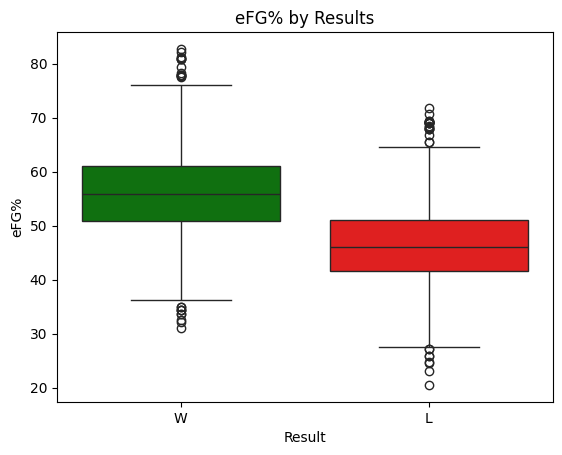

In [ ]:

subset_df=historical_df.sample(n=300,random_state=17)
historical_df['o_eFG%'] = pd.to_numeric(historical_df['o_eFG%'], errors='coerce')
mean_fg=historical_df['o_eFG%'].mean()
won_df = historical_df[historical_df['Won/Loss'] == 'W']
lost_df = historical_df[historical_df['Won/Loss'] == 'L']
won_df.dropna(subset=['o_eFG%'])
lost_df.dropna(subset=['o_eFG%'])
results=stats.ttest_1samp(won_df['o_eFG%'], mean_fg)
results2=stats.ttest_1samp(lost_df['o_eFG%'], mean_fg)
print(f'Statistic: {results[0]}, P-Value: {results[1]}')
print(f'Statistic: {results2[0]}, P-Value: {results2[1]}')
sns.boxplot(x='Won/Loss', y='o_eFG%', data=historical_df,hue='Won/Loss', palette={'W': 'green', 'L': 'red'}, legend=False)
plt.title('eFG% by Results')
plt.xlabel('Result')
plt.ylabel('eFG%')

plt.show()
#display(new_historical_df)

As we can see from this T-Test there is a clear correlation between Offensive effective field goal percentage and the chance of a team winning a game which we can use later in our model to predict whether or not a team will win a game based on their average field goal percentage. Our results also show a P-Value of near 0 showing there is a extremely high correlation between the two. We used the single sample because when using the independent two-sample the p-value was so low it rounded to 0 so we went with 2 single sample instead.
Doing this we know we can reject the null hypothesis and accept the alternative.

**Statistical Test 2-**

Now we will run a chi-square test to see if being home neutral or away really impacts win and losses of games. We have the true advantage according to other data but we should compare with a chi square to see if there is a actual large impact where it is important to factor into our project.\
**H0:** There will be no impact on winning or losing games based on where the games are played.\
**HA:** There will be a statistically signficant impact on winning or losing games based on where the games are played.\
**α:** 0.5

Venue       A    H    N
Won/Loss               
L         325   95  140
W         106  210  124
Chi-Square Statistic: 143.27189020006472
P-Value: 7.742912244219655e-32


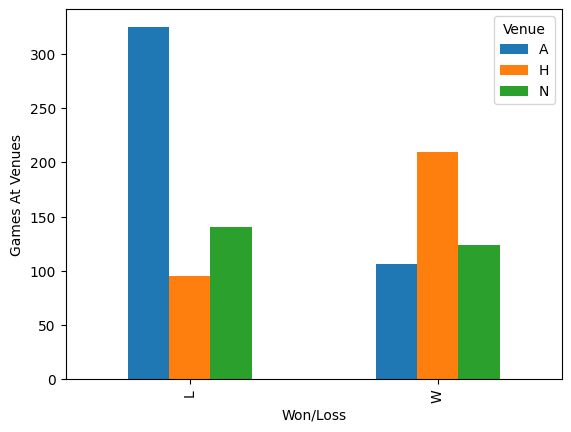

In [ ]:
subset_df=historical_df.sample(n=1000,random_state=17)
contingency_table=pd.crosstab(subset_df['Won/Loss'],subset_df['Venue'])
print(contingency_table)
chi_results=stats.chi2_contingency(contingency_table)
print(f'Chi-Square Statistic: {chi_results[0]}')
print(f'P-Value: {chi_results[1]}')
ax=contingency_table.plot(kind='bar')
ax.set_ylabel('Games At Venues')
plt.show()


From this we can see there is a statistical difference between winning games and the venue these games are held in. However as we can see through our chi squared bar graph there is a significantly higher could of away losses overall than any other game in our data set. This could be skewing our results and is something we definetly should account for moving forward. However due to our low p-value we reject the H0 and ac

**Statistical Test 3-**

Now we will see if having a higher adjusted offensive efficiency or AdjO will lead to a higher score and vice versa with a 2 sample T test.\
**H0:** A higher adjusted offensive efficiency has no impact on having a higher score.\
**HA:** A higher adjusted offensive efficiency has a statistical impact on having a higher score.\
**α=**0.05


Statistic: 14.565131061877123, P-Value: 1.161739659732832e-36


<Axes: xlabel='Adj. O', ylabel='Score'>

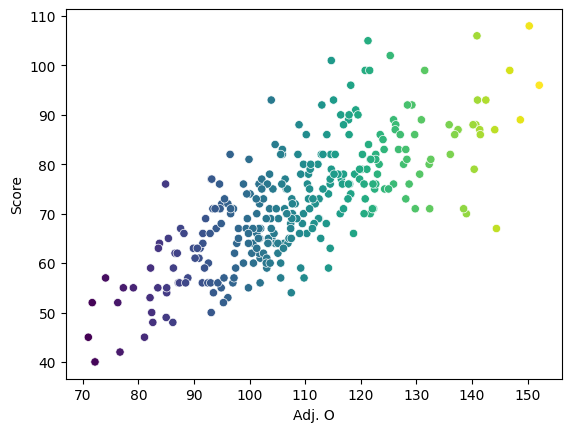

In [ ]:
subset_df=historical_df.sample(n=300,random_state=17)
subset_df['Adj. O'] = pd.to_numeric(subset_df['Adj. O'], errors='coerce')
mean_adjO=subset_df['Adj. O'].mean()
high_adjO=subset_df[subset_df['Adj. O']>mean_adjO]
low_adjO=subset_df[subset_df['Adj. O']<mean_adjO]
results=stats.ttest_ind(high_adjO['Score'],low_adjO['Score'])
print(f'Statistic: {results[0]}, P-Value: {results[1]}')
sns.scatterplot(x='Adj. O', y='Score', data=subset_df,hue='Adj. O', legend=False, palette='viridis')


From the graph and from out p-value we reject the HO and we can say that adjusted offensive efficiency has a statistical impact on having a higher or lower score. So overall we can see generally a higher adjO leads to a higher score.

# Data Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error, mean_squared_error, r2_score
from sklearn.inspection import permutation_importance
import joblib
import os


In [ ]:
import time
import pandas as pd
import io
import re
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
# Data needs slight manual cleanup in excel after
def scrape_to_csv(output_filename='current_team_stats.csv'):
    print("Starting T-Rank data scraping...")

    # Configure Chrome options
    chrome_options = Options()
    chrome_options.add_argument("--headless")
    chrome_options.add_argument("--disable-gpu")
    chrome_options.add_argument("--window-size=1920,1080")
    chrome_options.add_argument("--no-sandbox")
    chrome_options.add_argument("--disable-dev-shm-usage")

    driver = webdriver.Chrome(options=chrome_options)

    try:
        # Load the main page
        driver.get("https://barttorvik.com/trank.php")
        print("Loaded T-Rank website")

        # Wait for the page to load
        time.sleep(10)

        # Get the rendered HTML
        html = driver.page_source

        # Parse with BeautifulSoup
        soup = BeautifulSoup(html, "html.parser")

        # Find all tables in the document
        tables = soup.find_all("table")

        if not tables:
            print("Couldn't find any tables on the page")
            return

        print(f"Found {len(tables)} tables on the page")

        # Use the first table
        main_table = tables[0]

        # Parse the table using pandas with StringIO to avoid the warning
        df = pd.read_html(io.StringIO(str(main_table)))[0]

        print(f"Successfully scraped data for {len(df)} teams")

        # The DataFrame has multi-level columns, let's flatten them
        # Convert multi-level columns to single level
        if isinstance(df.columns, pd.MultiIndex):
            # For multi-level columns, use the second level as these contain the actual metric names
            new_columns = []
            for col in df.columns:
                if len(col) >= 2:
                    new_columns.append(col[1])  # Use second level
                else:
                    new_columns.append(col)
            df.columns = new_columns

        print("Flattened columns:", df.columns.tolist())

        # Map the column names from T-Rank to our standardized names
        column_mapping = {
            'Rk': 'Rank',
            'Team': 'Team',
            'AdjOE': 'Adj. O',         # Adjusted Offensive Efficiency
            'AdjDE': 'Adj. D',         # Adjusted Defensive Efficiency
            'Adj T.': 'T',             # Tempo
            'EFG%': 'eFG%_O',          # Offensive Effective FG%
            'EFGD%': 'eFG%_D',         # Defensive Effective FG%
            'TOR': 'TO%_O',            # Offensive Turnover %
            'TORD': 'TO%_D',           # Defensive Turnover %
            'ORB': 'Reb%_O',           # Offensive Rebounding %
            'DRB': 'Reb%_D',           # Defensive Rebounding %
            'FTR': 'FTR_O',            # Offensive Free Throw Rate
            'FTRD': 'FTR_D'            # Defensive Free Throw Rate
        }

        # Print the actual columns to help debug
        print("Actual columns in the table:")
        for col in df.columns:
            print(f"  - {col}")

        # Check which columns actually exist in the dataframe
        available_columns = {col: new_col for col, new_col in column_mapping.items() if col in df.columns}

        if not available_columns:
            print("None of the expected columns were found.")
            return

        print("Matched columns:", available_columns)

        # Rename the columns we have
        df_renamed = df.rename(columns=available_columns)

        # Check if we're missing any required columns
        required_columns = ['Team', 'Adj. O', 'Adj. D', 'T',
                           'eFG%_O', 'TO%_O', 'Reb%_O', 'FTR_O',
                           'eFG%_D', 'TO%_D', 'Reb%_D', 'FTR_D']

        missing_columns = [col for col in required_columns if col not in df_renamed.columns]

        if missing_columns:
            print(f"Warning: Missing these required columns: {missing_columns}")

            # Add missing columns with NaN values
            for col in missing_columns:
                df_renamed[col] = float('nan')

        # Clean up the numeric columns by removing the ranking numbers
        # This extracts just the first number from strings like "129.4 2"
        for col in required_columns:
            if col != 'Team' and col in df_renamed.columns:
                # Convert to string first to ensure we can use string operations
                df_renamed[col] = df_renamed[col].astype(str)

                # Use a regex to extract just the first number
                df_renamed[col] = df_renamed[col].apply(
                    lambda x: re.match(r'(\d+\.\d+|\d+)', x).group(1) if re.match(r'(\d+\.\d+|\d+)', x) else x
                )

                # Convert back to float
                try:
                    df_renamed[col] = pd.to_numeric(df_renamed[col], errors='coerce')
                except:
                    print(f"Could not convert column {col} to numeric")

        # Keep only the required columns
        final_df = df_renamed[required_columns]

        # Save to CSV
        final_df.to_csv(output_filename, index=False)
        print(f"Data saved to {output_filename}")

        # Return the dataframe for inspection
        return final_df

    except Exception as e:
        print(f"Error during scraping: {e}")
        import traceback
        traceback.print_exc()
    finally:
        driver.quit()
        print("Browser closed")

if __name__ == "__main__":
    df = scrape_to_csv()
    if df is not None:
        print("\nDataframe head:")
        print(df.head())

        # Check for missing values
        missing_values = df.isnull().sum()
        print("\nMissing values by column:")
        print(missing_values[missing_values > 0])

In [ ]:
try:
    import xgboost as xgb
    HAS_XGBOOST = True
except ImportError:
    print("XGBoost not installed. XGBoost models will be skipped.")
    HAS_XGBOOST = False

# Create a directory to save models
if not os.path.exists('models'):
    os.makedirs('models')

# ================= DATA PREPARATION =================
# Load data
print("Loading data...")
historical_data = pd.read_csv('Cleaned_Historicals.csv')
current_data = pd.read_csv('Cleaned_2025.csv')

# Check column names to identify inconsistencies
print("Historical data columns:", historical_data.columns.tolist())
print("Current data columns:", current_data.columns.tolist())


# Verify numeric types
historical_data_numeric = historical_data.select_dtypes(include=[np.number])
current_data_numeric = current_data.select_dtypes(include=[np.number])

# Feature selection - using metrics that would be available pre-game
# For example, we can't use actual game scores to predict the winner
feature_columns = [
    'Adj. O', 'Adj. D', 'T',
    'eFG%_O', 'TO%_O', 'Reb%_O', 'FTR_O',
    'eFG%_D', 'TO%_D', 'Reb%_D', 'FTR_D',
    'hca'  # Home court advantage
]

# Create opponent-specific features
def create_matchup_features(df):
    """
    Create features that represent the matchup between teams
    by adding opponent statistics for each game.
    """
    # First, create team average stats
    team_stats = {}

    # We'll average stats across all games for each team
    for team in df['Team'].unique():
        team_data = df[df['Team'] == team]
        team_stats[team] = {
            'Avg_Adj_O': team_data['Adj. O'].mean(),
            'Avg_Adj_D': team_data['Adj. D'].mean(),
            'Avg_T': team_data['T'].mean(),
            'Avg_eFG_O': team_data['eFG%_O'].mean(),
            'Avg_TO_O': team_data['TO%_O'].mean(),
            'Avg_Reb_O': team_data['Reb%_O'].mean(),
            'Avg_FTR_O': team_data['FTR_O'].mean(),
            'Avg_eFG_D': team_data['eFG%_D'].mean(),
            'Avg_TO_D': team_data['TO%_D'].mean(),
            'Avg_Reb_D': team_data['Reb%_D'].mean(),
            'Avg_FTR_D': team_data['FTR_D'].mean(),
        }

    # Now add opponent stats to each game
    matchup_df = df.copy()

    # Initialize opponent stat columns
    opp_columns = [
        'Opp_Avg_Adj_O', 'Opp_Avg_Adj_D', 'Opp_Avg_T',
        'Opp_Avg_eFG_O', 'Opp_Avg_TO_O', 'Opp_Avg_Reb_O', 'Opp_Avg_FTR_O',
        'Opp_Avg_eFG_D', 'Opp_Avg_TO_D', 'Opp_Avg_Reb_D', 'Opp_Avg_FTR_D'
    ]

    for col in opp_columns:
        matchup_df[col] = 0.0

    # Add opponent average stats
    for idx, row in matchup_df.iterrows():
        opponent = row['Opp.']
        if opponent in team_stats:
            opp_stats = team_stats[opponent]
            matchup_df.at[idx, 'Opp_Avg_Adj_O'] = opp_stats['Avg_Adj_O']
            matchup_df.at[idx, 'Opp_Avg_Adj_D'] = opp_stats['Avg_Adj_D']
            matchup_df.at[idx, 'Opp_Avg_T'] = opp_stats['Avg_T']
            matchup_df.at[idx, 'Opp_Avg_eFG_O'] = opp_stats['Avg_eFG_O']
            matchup_df.at[idx, 'Opp_Avg_TO_O'] = opp_stats['Avg_TO_O']
            matchup_df.at[idx, 'Opp_Avg_Reb_O'] = opp_stats['Avg_Reb_O']
            matchup_df.at[idx, 'Opp_Avg_FTR_O'] = opp_stats['Avg_FTR_O']
            matchup_df.at[idx, 'Opp_Avg_eFG_D'] = opp_stats['Avg_eFG_D']
            matchup_df.at[idx, 'Opp_Avg_TO_D'] = opp_stats['Avg_TO_D']
            matchup_df.at[idx, 'Opp_Avg_Reb_D'] = opp_stats['Avg_Reb_D']
            matchup_df.at[idx, 'Opp_Avg_FTR_D'] = opp_stats['Avg_FTR_D']

    # Create matchup features
    matchup_df['Offense_vs_Defense'] = matchup_df['Adj. O'] - matchup_df['Opp_Avg_Adj_D']
    matchup_df['Defense_vs_Offense'] = matchup_df['Adj. D'] - matchup_df['Opp_Avg_Adj_O']
    matchup_df['Tempo_Differential'] = matchup_df['T'] - matchup_df['Opp_Avg_T']

    # Four factors matchups
    matchup_df['eFG_Advantage_O'] = matchup_df['eFG%_O'] - matchup_df['Opp_Avg_eFG_D']
    matchup_df['TO_Advantage_O'] = matchup_df['Opp_Avg_TO_D'] - matchup_df['TO%_O']  # Lower TO% is better
    matchup_df['Reb_Advantage_O'] = matchup_df['Reb%_O'] - matchup_df['Opp_Avg_Reb_D']
    matchup_df['FTR_Advantage_O'] = matchup_df['FTR_O'] - matchup_df['Opp_Avg_FTR_D']

    matchup_df['eFG_Advantage_D'] = matchup_df['Opp_Avg_eFG_O'] - matchup_df['eFG%_D']  # Lower eFG%_D is better
    matchup_df['TO_Advantage_D'] = matchup_df['TO%_D'] - matchup_df['Opp_Avg_TO_O']
    matchup_df['Reb_Advantage_D'] = matchup_df['Opp_Avg_Reb_O'] - matchup_df['Reb%_D']  # Lower Reb%_D is better
    matchup_df['FTR_Advantage_D'] = matchup_df['Opp_Avg_FTR_O'] - matchup_df['FTR_D']  # Lower FTR_D is better

    return matchup_df

# Create matchup features
print("Creating matchup features...")
historical_matchups = create_matchup_features(historical_data)
current_matchups = create_matchup_features(current_data)

# Define final feature set - original features plus matchup features
all_features = feature_columns + [
    'Offense_vs_Defense', 'Defense_vs_Offense', 'Tempo_Differential',
    'eFG_Advantage_O', 'TO_Advantage_O', 'Reb_Advantage_O', 'FTR_Advantage_O',
    'eFG_Advantage_D', 'TO_Advantage_D', 'Reb_Advantage_D', 'FTR_Advantage_D'
]

# Prepare data for modeling
print("Preparing data for modeling...")
X_train = historical_matchups[all_features].copy()
y_train_winner = (historical_matchups['W/L'] == 'W').astype(int)  # 1 = win, 0 = loss
y_train_spread = historical_matchups['Spread']
y_train_team_score = historical_matchups['Team_Score']
y_train_opp_score = historical_matchups['Opp_Score']

X_test = current_matchups[all_features].copy()
y_test_winner = (current_matchups['W/L'] == 'W').astype(int)
y_test_spread = current_matchups['Spread']
y_test_team_score = current_matchups['Team_Score']
y_test_opp_score = current_matchups['Opp_Score']

# Standardize features
print("Scaling features...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save the scaler
joblib.dump(scaler, 'models/scaler.joblib')
print("Saved feature scaler to models/scaler.joblib")

# Convert to DataFrame with column names (for feature importance)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=all_features)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=all_features)


Loading data...


FileNotFoundError: [Errno 2] No such file or directory: 'Cleaned_Historicals.csv'

# ML Models

Logistic Regression

In [ ]:
# Simple baseline model for predicting game winners
def train_logistic_regression():
    print("\n=== Training Logistic Regression Model for Win Prediction ===")

    # Create and train model
    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(X_train_scaled, y_train_winner)

    # Make predictions
    train_preds = model.predict(X_train_scaled)
    test_preds = model.predict(X_test_scaled)

    # Calculate accuracy
    train_accuracy = accuracy_score(y_train_winner, train_preds)
    test_accuracy = accuracy_score(y_test_winner, test_preds)

    print(f"Training accuracy: {train_accuracy:.4f}")
    print(f"Testing accuracy: {test_accuracy:.4f}")

    # Generate confusion matrix
    cm = confusion_matrix(y_test_winner, test_preds)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Loss', 'Win'],
                yticklabels=['Loss', 'Win'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Logistic Regression Confusion Matrix')
    plt.savefig('models/logistic_confusion_matrix.png')

    # Feature importance (coefficients)
    coefficients = pd.DataFrame({
        'Feature': all_features,
        'Coefficient': model.coef_[0]
    }).sort_values('Coefficient', ascending=False)

    # Plot feature importance
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Coefficient', y='Feature', data=coefficients)
    plt.title('Logistic Regression Feature Coefficients')
    plt.tight_layout()
    plt.savefig('models/logistic_feature_importance.png')

    # Save model
    joblib.dump(model, 'models/logistic_regression.joblib')
    print("Saved logistic regression model to models/logistic_regression.joblib")

    return model, train_accuracy, test_accuracy


Random Forest

In [ ]:
def train_random_forest():
    print("\n=== Training Random Forest Models ===")

    # Win prediction model
    rf_classifier = RandomForestClassifier(n_estimators=500, max_depth=15, random_state=42)
    rf_classifier.fit(X_train_scaled, y_train_winner)

    # Spread prediction model
    rf_regressor = RandomForestRegressor(n_estimators=500, max_depth=15,min_samples_leaf=5, random_state=42)
    rf_regressor.fit(X_train_scaled, y_train_spread)

    # Make predictions
    train_win_preds = rf_classifier.predict(X_train_scaled)
    test_win_preds = rf_classifier.predict(X_test_scaled)

    train_spread_preds = rf_regressor.predict(X_train_scaled)
    test_spread_preds = rf_regressor.predict(X_test_scaled)

    # Calculate accuracy for win prediction
    train_win_accuracy = accuracy_score(y_train_winner, train_win_preds)
    test_win_accuracy = accuracy_score(y_test_winner, test_win_preds)

    print(f"Random Forest Win Prediction:")
    print(f"  Training accuracy: {train_win_accuracy:.4f}")
    print(f"  Testing accuracy: {test_win_accuracy:.4f}")

    # Calculate metrics for spread prediction
    train_spread_mae = mean_absolute_error(y_train_spread, train_spread_preds)
    test_spread_mae = mean_absolute_error(y_test_spread, test_spread_preds)

    print(f"Random Forest Spread Prediction:")
    print(f"  Training MAE: {train_spread_mae:.4f}")
    print(f"  Testing MAE: {test_spread_mae:.4f}")

    # Generate confusion matrix for win prediction
    cm = confusion_matrix(y_test_winner, test_win_preds)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Loss', 'Win'],
                yticklabels=['Loss', 'Win'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Random Forest Win Prediction Confusion Matrix')
    plt.savefig('models/rf_confusion_matrix.png')

    # Feature importance for win prediction
    win_importance = pd.DataFrame({
        'Feature': all_features,
        'Importance': rf_classifier.feature_importances_
    }).sort_values('Importance', ascending=False)

    # Plot feature importance for win prediction
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=win_importance.head(15))
    plt.title('Random Forest Win Prediction - Feature Importance')
    plt.tight_layout()
    plt.savefig('models/rf_win_feature_importance.png')

    # Feature importance for spread prediction
    spread_importance = pd.DataFrame({
        'Feature': all_features,
        'Importance': rf_regressor.feature_importances_
    }).sort_values('Importance', ascending=False)

    # Plot feature importance for spread prediction
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=spread_importance.head(15))
    plt.title('Random Forest Spread Prediction - Feature Importance')
    plt.tight_layout()
    plt.savefig('models/rf_spread_feature_importance.png')

    # Plot spread prediction vs actual
    plt.figure(figsize=(10, 8))
    plt.scatter(y_test_spread, test_spread_preds, alpha=0.5)
    plt.plot([-30, 30], [-30, 30], 'r--')  # Diagonal line
    plt.xlabel('Actual Spread')
    plt.ylabel('Predicted Spread')
    plt.title('Random Forest: Actual vs Predicted Spread')
    plt.grid(True)
    plt.savefig('models/rf_spread_predictions.png')

    # Save models
    joblib.dump(rf_classifier, 'models/random_forest_classifier.joblib')
    joblib.dump(rf_regressor, 'models/random_forest_regressor.joblib')
    print("Saved Random Forest models to models/ directory")

    return (rf_classifier, rf_regressor,
            train_win_accuracy, test_win_accuracy,
            train_spread_mae, test_spread_mae)


Gradient Boosting

In [ ]:
# ================= MODEL 3: GRADIENT BOOSTING =================
# Gradient Boosting for win prediction and spread prediction
def train_gradient_boosting():
    print("\n=== Training Gradient Boosting Models ===")

    # Win prediction model
    gb_classifier = GradientBoostingClassifier(n_estimators=300, learning_rate=.05, max_depth=6, subsample=.8, random_state=42)
    gb_classifier.fit(X_train_scaled, y_train_winner)

    # Spread prediction model
    gb_regressor = GradientBoostingRegressor(n_estimators=300, learning_rate=.03, max_depth=6, subsample=.8, min_samples_leaf=5, random_state=42)
    gb_regressor.fit(X_train_scaled, y_train_spread)

    # Make predictions
    train_win_preds = gb_classifier.predict(X_train_scaled)
    test_win_preds = gb_classifier.predict(X_test_scaled)

    train_spread_preds = gb_regressor.predict(X_train_scaled)
    test_spread_preds = gb_regressor.predict(X_test_scaled)

    # Calculate accuracy for win prediction
    train_win_accuracy = accuracy_score(y_train_winner, train_win_preds)
    test_win_accuracy = accuracy_score(y_test_winner, test_win_preds)

    print(f"Gradient Boosting Win Prediction:")
    print(f"  Training accuracy: {train_win_accuracy:.4f}")
    print(f"  Testing accuracy: {test_win_accuracy:.4f}")

    # Calculate metrics for spread prediction
    train_spread_mae = mean_absolute_error(y_train_spread, train_spread_preds)
    test_spread_mae = mean_absolute_error(y_test_spread, test_spread_preds)

    print(f"Gradient Boosting Spread Prediction:")
    print(f"  Training MAE: {train_spread_mae:.4f}")
    print(f"  Testing MAE: {test_spread_mae:.4f}")

    # Generate confusion matrix for win prediction
    cm = confusion_matrix(y_test_winner, test_win_preds)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Loss', 'Win'],
                yticklabels=['Loss', 'Win'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Gradient Boosting Win Prediction Confusion Matrix')
    plt.savefig('models/gb_confusion_matrix.png')

    # Feature importance for win prediction
    win_importance = pd.DataFrame({
        'Feature': all_features,
        'Importance': gb_classifier.feature_importances_
    }).sort_values('Importance', ascending=False)

    # Plot feature importance for win prediction
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=win_importance.head(15))
    plt.title('Gradient Boosting Win Prediction - Feature Importance')
    plt.tight_layout()
    plt.savefig('models/gb_win_feature_importance.png')

    # Feature importance for spread prediction
    spread_importance = pd.DataFrame({
        'Feature': all_features,
        'Importance': gb_regressor.feature_importances_
    }).sort_values('Importance', ascending=False)

    # Plot feature importance for spread prediction
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=spread_importance.head(15))
    plt.title('Gradient Boosting Spread Prediction - Feature Importance')
    plt.tight_layout()
    plt.savefig('models/gb_spread_feature_importance.png')

    # Plot spread prediction vs actual
    plt.figure(figsize=(10, 8))
    plt.scatter(y_test_spread, test_spread_preds, alpha=0.5)
    plt.plot([-30, 30], [-30, 30], 'r--')  # Diagonal line
    plt.xlabel('Actual Spread')
    plt.ylabel('Predicted Spread')
    plt.title('Gradient Boosting: Actual vs Predicted Spread')
    plt.grid(True)
    plt.savefig('models/gb_spread_predictions.png')

    # Save models
    joblib.dump(gb_classifier, 'models/gradient_boosting_classifier.joblib')
    joblib.dump(gb_regressor, 'models/gradient_boosting_regressor.joblib')
    print("Saved Gradient Boosting models to models/ directory")

    return (gb_classifier, gb_regressor,
            train_win_accuracy, test_win_accuracy,
            train_spread_mae, test_spread_mae)

XGB Boost

In [ ]:
# ================= MODEL 4: XGBOOST (OPTIONAL) =================
# XGBoost for win prediction and spread prediction, only if XGBoost is installed
def train_xgboost():
    if not HAS_XGBOOST:
        print("\n=== Skipping XGBoost Models (XGBoost not installed) ===")
        # Return placeholder results
        return (None, None, 0, 0, 0, 0)

    print("\n=== Training XGBoost Models ===")

    # Win prediction model
    xgb_classifier = xgb.XGBClassifier(
        n_estimators=300,
        learning_rate=0.03,
        max_depth=6,
        random_state=42
    )
    xgb_classifier.fit(X_train_scaled, y_train_winner)

    # Spread prediction model
    xgb_regressor = xgb.XGBRegressor(
         n_estimators=300,
        learning_rate=0.03,
        max_depth=6,
        min_child_weight=5,
        reg_alpha=.5,
        reg_lambda=1,
        random_state=42
    )
    xgb_regressor.fit(X_train_scaled, y_train_spread)

    # Make predictions
    train_win_preds = xgb_classifier.predict(X_train_scaled)
    test_win_preds = xgb_classifier.predict(X_test_scaled)

    train_spread_preds = xgb_regressor.predict(X_train_scaled)
    test_spread_preds = xgb_regressor.predict(X_test_scaled)

    # Calculate accuracy for win prediction
    train_win_accuracy = accuracy_score(y_train_winner, train_win_preds)
    test_win_accuracy = accuracy_score(y_test_winner, test_win_preds)

    print(f"XGBoost Win Prediction:")
    print(f"  Training accuracy: {train_win_accuracy:.4f}")
    print(f"  Testing accuracy: {test_win_accuracy:.4f}")

    # Calculate metrics for spread prediction
    train_spread_mae = mean_absolute_error(y_train_spread, train_spread_preds)
    test_spread_mae = mean_absolute_error(y_test_spread, test_spread_preds)

    print(f"XGBoost Spread Prediction:")
    print(f"  Training MAE: {train_spread_mae:.4f}")
    print(f"  Testing MAE: {test_spread_mae:.4f}")

    # Generate confusion matrix for win prediction
    cm = confusion_matrix(y_test_winner, test_win_preds)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Loss', 'Win'],
                yticklabels=['Loss', 'Win'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('XGBoost Win Prediction Confusion Matrix')
    plt.savefig('models/xgb_confusion_matrix.png')

    # Feature importance for win prediction
    win_importance = pd.DataFrame({
        'Feature': all_features,
        'Importance': xgb_classifier.feature_importances_
    }).sort_values('Importance', ascending=False)

    # Plot feature importance for win prediction
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=win_importance.head(15))
    plt.title('XGBoost Win Prediction - Feature Importance')
    plt.tight_layout()
    plt.savefig('models/xgb_win_feature_importance.png')

    # Feature importance for spread prediction
    spread_importance = pd.DataFrame({
        'Feature': all_features,
        'Importance': xgb_regressor.feature_importances_
    }).sort_values('Importance', ascending=False)

    # Plot feature importance for spread prediction
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=spread_importance.head(15))
    plt.title('XGBoost Spread Prediction - Feature Importance')
    plt.tight_layout()
    plt.savefig('models/xgb_spread_feature_importance.png')

    # Plot spread prediction vs actual
    plt.figure(figsize=(10, 8))
    plt.scatter(y_test_spread, test_spread_preds, alpha=0.5)
    plt.plot([-30, 30], [-30, 30], 'r--')  # Diagonal line
    plt.xlabel('Actual Spread')
    plt.ylabel('Predicted Spread')
    plt.title('XGBoost: Actual vs Predicted Spread')
    plt.grid(True)
    plt.savefig('models/xgb_spread_predictions.png')

    # Save models
    joblib.dump(xgb_classifier, 'models/xgboost_classifier.joblib')
    joblib.dump(xgb_regressor, 'models/xgboost_regressor.joblib')
    print("Saved XGBoost models to models/ directory")

    return (xgb_classifier, xgb_regressor,
            train_win_accuracy, test_win_accuracy,
            train_spread_mae, test_spread_mae)


In [ ]:
def train_score_predictor():
    print("\n=== Training Score Prediction Models ===")

    # Create a model to predict Team's score
    score_model = RandomForestRegressor(n_estimators=300,max_depth=12, random_state=42)
    score_model.fit(X_train_scaled, y_train_team_score)

    # Create a model to predict Opponent's score
    opp_score_model = RandomForestRegressor(n_estimators=300, max_depth=12, random_state=42)
    opp_score_model.fit(X_train_scaled, y_train_opp_score)

    # Make predictions
    train_score_preds = score_model.predict(X_train_scaled)
    test_score_preds = score_model.predict(X_test_scaled)

    train_opp_score_preds = opp_score_model.predict(X_train_scaled)
    test_opp_score_preds = opp_score_model.predict(X_test_scaled)

    # Calculate metrics for score prediction
    train_score_mae = mean_absolute_error(y_train_team_score, train_score_preds)
    test_score_mae = mean_absolute_error(y_test_team_score, test_score_preds)

    train_opp_score_mae = mean_absolute_error(y_train_opp_score, train_opp_score_preds)
    test_opp_score_mae = mean_absolute_error(y_test_opp_score, test_opp_score_preds)

    print(f"Team Score Prediction:")
    print(f"  Training MAE: {train_score_mae:.4f}")
    print(f"  Testing MAE: {test_score_mae:.4f}")

    print(f"Opponent Score Prediction:")
    print(f"  Training MAE: {train_opp_score_mae:.4f}")
    print(f"  Testing MAE: {test_opp_score_mae:.4f}")

    # Calculate derived win/loss from predicted scores
    train_derived_winner = (train_score_preds > train_opp_score_preds).astype(int)
    test_derived_winner = (test_score_preds > test_opp_score_preds).astype(int)

    # Calculate accuracy for derived win prediction
    train_derived_accuracy = accuracy_score(y_train_winner, train_derived_winner)
    test_derived_accuracy = accuracy_score(y_test_winner, test_derived_winner)

    print(f"Derived Win Prediction from Scores:")
    print(f"  Training accuracy: {train_derived_accuracy:.4f}")
    print(f"  Testing accuracy: {test_derived_accuracy:.4f}")

    # Plot predicted vs actual scores
    plt.figure(figsize=(15, 6))

    plt.subplot(1, 2, 1)
    plt.scatter(y_test_team_score, test_score_preds, alpha=0.5)
    plt.plot([40, 100], [40, 100], 'r--')  # Diagonal line
    plt.xlabel('Actual Team Score')
    plt.ylabel('Predicted Team Score')
    plt.title('Team Score: Actual vs Predicted')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.scatter(y_test_opp_score, test_opp_score_preds, alpha=0.5)
    plt.plot([40, 100], [40, 100], 'r--')  # Diagonal line
    plt.xlabel('Actual Opponent Score')
    plt.ylabel('Predicted Opponent Score')
    plt.title('Opponent Score: Actual vs Predicted')
    plt.grid(True)

    plt.tight_layout()
    plt.savefig('models/score_predictions.png')

    # Save models
    joblib.dump(score_model, 'models/team_score_predictor.joblib')
    joblib.dump(opp_score_model, 'models/opponent_score_predictor.joblib')
    print("Saved score prediction models to models/ directory")

    return (score_model, opp_score_model,
            train_score_mae, test_score_mae,
            train_opp_score_mae, test_opp_score_mae,
            train_derived_accuracy, test_derived_accuracy)

def compare_models(model_results):
    print("\n=== Model Comparison ===")

    # Get model names (excluding any that were skipped)
    model_names = []
    train_accuracies = []
    test_accuracies = []

    # Check if we have logistic regression results
    if model_results[0] and len(model_results[0]) >= 2:
        model_names.append('Logistic Regression')
        train_accuracies.append(model_results[0][1])  # train_accuracy
        test_accuracies.append(model_results[0][2])   # test_accuracy

    # Results from RF, GB (and XGB if available)
    other_models = []

    # Add Random Forest if results exist
    if len(model_results) > 1 and model_results[1] and len(model_results[1]) >= 6:
        other_models.append(('Random Forest', model_results[1][2], model_results[1][3]))

    # Add Gradient Boosting if results exist
    if len(model_results) > 2 and model_results[2] and len(model_results[2]) >= 6:
        other_models.append(('Gradient Boosting', model_results[2][2], model_results[2][3]))

    # Add XGBoost if it was trained
    if len(model_results) > 3 and model_results[3] and model_results[3][0] is not None and len(model_results[3]) >= 6:
        other_models.append(('XGBoost', model_results[3][2], model_results[3][3]))

    # Add Score-Derived only if the results have enough elements
    if len(model_results) > 4 and model_results[4] and len(model_results[4]) >= 8:
        other_models.append(('Score-Derived', model_results[4][6], model_results[4][7]))

    # Add other models to our lists
    for name, train_acc, test_acc in other_models:
        model_names.append(name)
        train_accuracies.append(train_acc)
        test_accuracies.append(test_acc)

    # Safety check - if no models have results, return empty dataframes
    if not model_names:
        print("No model results available for comparison.")
        return pd.DataFrame(), pd.DataFrame()

    # Extract results for spread prediction models (excluding logistic regression)
    spread_model_names = []
    spread_train_maes = []
    spread_test_maes = []

    # Add Random Forest if results exist
    if len(model_results) > 1 and model_results[1] and len(model_results[1]) >= 6:
        spread_model_names.append('Random Forest')
        spread_train_maes.append(model_results[1][4])
        spread_test_maes.append(model_results[1][5])

    # Add Gradient Boosting if results exist
    if len(model_results) > 2 and model_results[2] and len(model_results[2]) >= 6:
        spread_model_names.append('Gradient Boosting')
        spread_train_maes.append(model_results[2][4])
        spread_test_maes.append(model_results[2][5])

    # Add XGBoost if it was trained
    if len(model_results) > 3 and model_results[3] and model_results[3][0] is not None and len(model_results[3]) >= 6:
        spread_model_names.append('XGBoost')
        spread_train_maes.append(model_results[3][4])
        spread_test_maes.append(model_results[3][5])

    # Safety check - if no spread models have results, return just win comparison
    if not spread_model_names:
        print("No spread prediction results available for comparison.")
        win_comparison = pd.DataFrame({
            'Model': model_names,
            'Training Accuracy': train_accuracies,
            'Testing Accuracy': test_accuracies
        })
        return win_comparison, pd.DataFrame()

    # Create comparison dataframe for win prediction
    win_comparison = pd.DataFrame({
        'Model': model_names,
        'Training Accuracy': train_accuracies,
        'Testing Accuracy': test_accuracies
    })

    # Create comparison dataframe for spread prediction
    spread_comparison = pd.DataFrame({
        'Model': spread_model_names,
        'Training MAE': spread_train_maes,
        'Testing MAE': spread_test_maes
    })

    # Plot win prediction comparison if we have data
    if model_names:
        plt.figure(figsize=(10, 6))
        x = np.arange(len(model_names))
        width = 0.35

        plt.bar(x - width/2, train_accuracies, width, label='Training Accuracy')
        plt.bar(x + width/2, test_accuracies, width, label='Testing Accuracy')

        plt.xlabel('Model')
        plt.ylabel('Accuracy')
        plt.title('Win Prediction Models Comparison')
        plt.xticks(x, model_names, rotation=45)
        plt.legend()
        plt.tight_layout()
        plt.savefig('models/win_model_comparison.png')

    # Plot spread prediction comparison if we have data
    if spread_model_names:
        plt.figure(figsize=(10, 6))
        x = np.arange(len(spread_model_names))
        width = 0.35

        plt.bar(x - width/2, spread_train_maes, width, label='Training MAE')
        plt.bar(x + width/2, spread_test_maes, width, label='Testing MAE')

        plt.xlabel('Model')
        plt.ylabel('Mean Absolute Error')
        plt.title('Spread Prediction Models Comparison')
        plt.xticks(x, spread_model_names, rotation=45)
        plt.legend()
        plt.tight_layout()
        plt.savefig('models/spread_model_comparison.png')

    return win_comparison, spread_comparison

# ================= PREDICTION FUNCTION FOR NEW GAMES (FOR TESTING ONLY) =================
# NOTE: This function is for development and testing purposes only.
# For actual game predictions, use the standalone prediction_tool.py script.
def predict_new_game(team, opponent, venue='N', hca=0, team_stats=None, opp_stats=None):
    """
    Predict a new game using the best models.

    Args:
        team: Team name
        opponent: Opponent name
        venue: Venue type ('H' for home, 'A' for away, 'N' for neutral)
        hca: Home court advantage value (if known)
        team_stats: Dictionary of team stats
        opp_stats: Dictionary of opponent stats

    Returns:
        Predictions for win probability, spread, and scores
    """
    # Choose the best model (based on previous test accuracy results)
    if HAS_XGBOOST:
        classifier = joblib.load('models/xgboost_classifier.joblib')
        spread_predictor = joblib.load('models/xgboost_regressor.joblib')
    else:
        # Use gradient boosting if XGBoost is not available
        classifier = joblib.load('models/gradient_boosting_classifier.joblib')
        spread_predictor = joblib.load('models/gradient_boosting_regressor.joblib')

    team_score_predictor = joblib.load('models/team_score_predictor.joblib')
    opp_score_predictor = joblib.load('models/opponent_score_predictor.joblib')
    scaler = joblib.load('models/scaler.joblib')

    # If team stats are not provided, use average stats from training data
    if team_stats is None or opp_stats is None:
        avg_stats = {
            'Adj. O': X_train['Adj. O'].mean(),
            'Adj. D': X_train['Adj. D'].mean(),
            'T': X_train['T'].mean(),
            'eFG%_O': X_train['eFG%_O'].mean(),
            'TO%_O': X_train['TO%_O'].mean(),
            'Reb%_O': X_train['Reb%_O'].mean(),
            'FTR_O': X_train['FTR_O'].mean(),
            'eFG%_D': X_train['eFG%_D'].mean(),
            'TO%_D': X_train['TO%_D'].mean(),
            'Reb%_D': X_train['Reb%_D'].mean(),
            'FTR_D': X_train['FTR_D'].mean(),
        }

        if team_stats is None:
            team_stats = avg_stats

        if opp_stats is None:
            opp_stats = avg_stats

    # If venue is Home, set hca
    if venue == 'H' and hca == 0:
        hca = 3.5  # Default home court advantage if not specified

    # Create feature vector for the game
    game_features = {
        'Adj. O': team_stats['Adj. O'],
        'Adj. D': team_stats['Adj. D'],
        'T': team_stats['T'],
        'eFG%_O': team_stats['eFG%_O'],
        'TO%_O': team_stats['TO%_O'],
        'Reb%_O': team_stats['Reb%_O'],
        'FTR_O': team_stats['FTR_O'],
        'eFG%_D': team_stats['eFG%_D'],
        'TO%_D': team_stats['TO%_D'],
        'Reb%_D': team_stats['Reb%_D'],
        'FTR_D': team_stats['FTR_D'],
        'hca': hca,

        # Opponent average statistics
        'Opp_Avg_Adj_O': opp_stats['Adj. O'],
        'Opp_Avg_Adj_D': opp_stats['Adj. D'],
        'Opp_Avg_T': opp_stats['T'],
        'Opp_Avg_eFG_O': opp_stats['eFG%_O'],
        'Opp_Avg_TO_O': opp_stats['TO%_O'],
        'Opp_Avg_Reb_O': opp_stats['Reb%_O'],
        'Opp_Avg_FTR_O': opp_stats['FTR_O'],
        'Opp_Avg_eFG_D': opp_stats['eFG%_D'],
        'Opp_Avg_TO_D': opp_stats['TO%_D'],
        'Opp_Avg_Reb_D': opp_stats['Reb%_D'],
        'Opp_Avg_FTR_D': opp_stats['FTR_D']
    }

    # Create matchup features
    game_features.update({
        'Offense_vs_Defense': game_features['Adj. O'] - game_features['Opp_Avg_Adj_D'],
        'Defense_vs_Offense': game_features['Adj. D'] - game_features['Opp_Avg_Adj_O'],
        'Tempo_Differential': game_features['T'] - game_features['Opp_Avg_T'],
        'eFG_Advantage_O': game_features['eFG%_O'] - game_features['Opp_Avg_eFG_D'],
        'TO_Advantage_O': game_features['Opp_Avg_TO_D'] - game_features['TO%_O'],
        'Reb_Advantage_O': game_features['Reb%_O'] - game_features['Opp_Avg_Reb_D'],
        'FTR_Advantage_O': game_features['FTR_O'] - game_features['Opp_Avg_FTR_D'],
        'eFG_Advantage_D': game_features['Opp_Avg_eFG_O'] - game_features['eFG%_D'],
        'TO_Advantage_D': game_features['TO%_D'] - game_features['Opp_Avg_TO_O'],
        'Reb_Advantage_D': game_features['Opp_Avg_Reb_O'] - game_features['Reb%_D'],
        'FTR_Advantage_D': game_features['Opp_Avg_FTR_O'] - game_features['FTR_D']
    })

    # Convert to DataFrame
    game_df = pd.DataFrame([game_features])

    # Select only features that were used in training
    game_features_scaled = scaler.transform(game_df[all_features])

    # Make predictions
    win_prob = classifier.predict_proba(game_features_scaled)[0, 1]
    spread_pred = spread_predictor.predict(game_features_scaled)[0]
    team_score_pred = team_score_predictor.predict(game_features_scaled)[0]
    opp_score_pred = opp_score_predictor.predict(game_features_scaled)[0]

    return {
        'team': team,
        'opponent': opponent,
        'win_probability': win_prob,
        'predicted_spread': spread_pred,
        'predicted_team_score': team_score_pred,
        'predicted_opp_score': opp_score_pred
    }

# ================= MAIN EXECUTION =================
def main():
    # Train all models
    logistic_result = train_logistic_regression()
    rf_results = train_random_forest()
    gb_results = train_gradient_boosting()
    xgb_results = train_xgboost()  # Will be skipped if XGBoost not installed
    score_results = train_score_predictor()

    # Compile results for comparison - make sure to pass the full result tuples
    model_results = [
        logistic_result,     # Logistic Regression tuple (model, train_acc, test_acc)
        rf_results,          # Random Forest tuple
        gb_results,          # Gradient Boosting tuple
        xgb_results,         # XGBoost tuple (or None)
        score_results        # Score-Derived tuple
    ]

    # Compare models
    win_comparison, spread_comparison = compare_models(model_results)

    print("\nWin Prediction Model Comparison:")
    print(win_comparison)

    print("\nSpread Prediction Model Comparison:")
    print(spread_comparison)

    # Example prediction for a new game
    print("\nExample Prediction:")

    try:
        # Use the first team from the test set for demonstration
        sample_team = current_data.iloc[0]['Team']
        sample_opponent = current_data.iloc[0]['Opp.']

        # Get team stats from historical data
        team_stats = {}
        opponent_stats = {}

        for team in [sample_team, sample_opponent]:
            team_data = historical_data[historical_data['Team'] == team]
            if len(team_data) > 0:
                stats = {
                    'Adj. O': team_data['Adj. O'].mean(),
                    'Adj. D': team_data['Adj. D'].mean(),
                    'T': team_data['T'].mean(),
                    'eFG%_O': team_data['eFG%_O'].mean(),
                    'TO%_O': team_data['TO%_O'].mean(),
                    'Reb%_O': team_data['Reb%_O'].mean(),
                    'FTR_O': team_data['FTR_O'].mean(),
                    'eFG%_D': team_data['eFG%_D'].mean(),
                    'TO%_D': team_data['TO%_D'].mean(),
                    'Reb%_D': team_data['Reb%_D'].mean(),
                    'FTR_D': team_data['FTR_D'].mean(),
                }

                if team == sample_team:
                    team_stats = stats
                else:
                    opponent_stats = stats

        prediction = predict_new_game(
            sample_team,
            sample_opponent,
            venue='H',  # Home game for demonstration
            hca=3.5,    # Default home court advantage
            team_stats=team_stats,
            opp_stats=opponent_stats
        )

        print(f"Game: {prediction['team']} vs {prediction['opponent']}")
        print(f"Win probability: {prediction['win_probability']:.2f}")
        print(f"Predicted spread: {prediction['predicted_spread']:.1f}")
        print(f"Predicted score: {prediction['predicted_team_score']:.1f} - {prediction['predicted_opp_score']:.1f}")
    except Exception as e:
        print(f"Error making prediction: {e}")
        print("This is expected since the models need to be saved first. Run the full script to save models.")

    print("\nAll models have been trained and saved to the 'models/' directory.")
    print("You can now use the standalone prediction tool to make predictions for new games.")

if __name__ == "__main__":
    main()


In [ ]:
import pandas as pd
import numpy as np
import joblib
import os
import random

# BASKETBALL PREDICTION MODEL WITH ENHANCED TEAM MISMATCH ADJUSTMENT
def predict_game(team1, team2, venue='N', close_game_adjust=True, mismatch_boost=True):
    """
    Predict a basketball game with enhanced close game adjustment for similar teams
    and mismatch boost for vastly different teams

    Parameters:
    -----------
    team1 : str
        First team (the model will favor this team)
    team2 : str
        Second team
    venue : str, default='N'
        Venue: 'H' if team1 is home, 'A' if team2 is home, 'N' for neutral
    close_game_adjust : bool, default=True
        Whether to apply close game adjustment
    mismatch_boost : bool, default=True
        Whether to apply mismatch boost for vastly different teams

    Returns:
    --------
    dict
        Game prediction results
    """
    print(f"\nPredicting: {team1} vs {team2} (Venue: {venue})")

    try:
        # Load team stats
        team_stats = pd.read_csv('current_team_stats.csv')

        # Load models
        xgb_classifier = joblib.load('models/xgboost_classifier.joblib')
        xgb_regressor = joblib.load('models/xgboost_regressor.joblib')
        gb_regressor = joblib.load('models/gradient_boosting_regressor.joblib')
        team_scorer = joblib.load('models/team_score_predictor.joblib')
        opp_scorer = joblib.load('models/opponent_score_predictor.joblib')
        scaler = joblib.load('models/scaler.joblib')

        print("All models loaded successfully")
    except Exception as e:
        print(f"Error loading models or data: {e}")
        return None

    # Look for teams
    team1_data = team_stats[team_stats['Team'] == team1]
    team2_data = team_stats[team_stats['Team'] == team2]

    if len(team1_data) == 0 or len(team2_data) == 0:
        print(f"Error: Team not found. Available teams: {team_stats['Team'].unique()}")
        return None

    # Get team stats
    team1_stats = team1_data.iloc[0].to_dict()
    team2_stats = team2_data.iloc[0].to_dict()

    # Get venue effect (simple approach)
    if venue == 'H':
        hca = 3.5  # Default home advantage
    elif venue == 'A':
        hca = -3.5  # Default away disadvantage
    else:
        hca = 0.0  # Neutral

    # Create features
    features = {
        'Adj. O': team1_stats['Adj. O'],
        'Adj. D': team1_stats['Adj. D'],
        'T': team1_stats['T'],
        'eFG%_O': team1_stats['eFG%_O'],
        'TO%_O': team1_stats['TO%_O'],
        'Reb%_O': team1_stats['Reb%_O'],
        'FTR_O': team1_stats['FTR_O'],
        'eFG%_D': team1_stats['eFG%_D'],
        'TO%_D': team1_stats['TO%_D'],
        'Reb%_D': team1_stats['Reb%_D'],
        'FTR_D': team1_stats['FTR_D'],
        'hca': hca,
    }

    # Get opponent stats
    features.update({
        'Opp_Avg_Adj_O': team2_stats['Adj. O'],
        'Opp_Avg_Adj_D': team2_stats['Adj. D'],
        'Opp_Avg_T': team2_stats['T'],
        'Opp_Avg_eFG_O': team2_stats['eFG%_O'],
        'Opp_Avg_TO_O': team2_stats['TO%_O'],
        'Opp_Avg_Reb_O': team2_stats['Reb%_O'],
        'Opp_Avg_FTR_O': team2_stats['FTR_O'],
        'Opp_Avg_eFG_D': team2_stats['eFG%_D'],
        'Opp_Avg_TO_D': team2_stats['TO%_D'],
        'Opp_Avg_Reb_D': team2_stats['Reb%_D'],
        'Opp_Avg_FTR_D': team2_stats['FTR_D']
    })

    # Add derived features
    features.update({
        'Offense_vs_Defense': features['Adj. O'] - features['Opp_Avg_Adj_D'],
        'Defense_vs_Offense': features['Adj. D'] - features['Opp_Avg_Adj_O'],
        'Tempo_Differential': features['T'] - features['Opp_Avg_T'],
        'eFG_Advantage_O': features['eFG%_O'] - features['Opp_Avg_eFG_D'],
        'TO_Advantage_O': features['Opp_Avg_TO_D'] - features['TO%_O'],
        'Reb_Advantage_O': features['Reb%_O'] - features['Opp_Avg_Reb_D'],
        'FTR_Advantage_O': features['FTR_O'] - features['Opp_Avg_FTR_D'],
        'eFG_Advantage_D': features['Opp_Avg_eFG_O'] - features['eFG%_D'],
        'TO_Advantage_D': features['TO%_D'] - features['Opp_Avg_TO_O'],
        'Reb_Advantage_D': features['Opp_Avg_Reb_O'] - features['Reb%_D'],
        'FTR_Advantage_D': features['Opp_Avg_FTR_O'] - features['FTR_D']
    })

    # Define expected feature order
    expected_features = [
        'Adj. O', 'Adj. D', 'T',
        'eFG%_O', 'TO%_O', 'Reb%_O', 'FTR_O',
        'eFG%_D', 'TO%_D', 'Reb%_D', 'FTR_D',
        'hca', 'Offense_vs_Defense', 'Defense_vs_Offense', 'Tempo_Differential',
        'eFG_Advantage_O', 'TO_Advantage_O', 'Reb_Advantage_O', 'FTR_Advantage_O',
        'eFG_Advantage_D', 'TO_Advantage_D', 'Reb_Advantage_D', 'FTR_Advantage_D'
    ]

    # Create DataFrame
    df = pd.DataFrame([features])[expected_features]

    # Scale features
    try:
        scaled_features = scaler.transform(df)
    except Exception as e:
        print(f"Error scaling features: {e}")
        return None

    # Make predictions

    # Win probability
    win_prob = xgb_classifier.predict_proba(scaled_features)[0, 1]  # team1 win prob

    # Spread predictions
    xgb_spread = xgb_regressor.predict(scaled_features)[0]  # positive = team1 favored
    gb_spread = gb_regressor.predict(scaled_features)[0]    # positive = team1 favored

    # Average the spread predictions
    spread = (xgb_spread + gb_spread) / 2
    original_spread = spread  # Store the original prediction

    # Calculate team similarity metrics (used for both adjustments)
    off_delta = abs(team1_stats['Adj. O'] - team2_stats['Adj. O'])
    def_delta = abs(team1_stats['Adj. D'] - team2_stats['Adj. D'])
    tempo_delta = abs(team1_stats['T'] - team2_stats['T'])
    efg_off_delta = abs(team1_stats['eFG%_O'] - team2_stats['eFG%_O'])
    efg_def_delta = abs(team1_stats['eFG%_D'] - team2_stats['eFG%_D'])

    # Calculate enhanced team strength similarity score (0 to 1 scale)
    # Higher means more similar teams (more likely to be a close game)
    base_similarity = 1.0 - min(1.0, (off_delta + def_delta) / 40.0)
    style_similarity = 1.0 - min(1.0, (tempo_delta / 10.0 + efg_off_delta / 0.1 + efg_def_delta / 0.1) / 3.0)
    similarity = (base_similarity * 0.8) + (style_similarity * 0.2)

    # Calculate mismatch score (inverse of similarity - higher means more mismatched)
    mismatch_score = 1.0 - similarity

    # Categorize based on similarity/mismatch
    if similarity > 0.85:
        similarity_tier = "Very High"
        mismatch_tier = "Very Low"
    elif similarity > 0.7:
        similarity_tier = "High"
        mismatch_tier = "Low"
    elif similarity > 0.5:
        similarity_tier = "Medium"
        mismatch_tier = "Medium"
    elif similarity > 0.3:
        similarity_tier = "Low"
        mismatch_tier = "High"
    else:
        similarity_tier = "Very Low"
        mismatch_tier = "Very High"

    # Initialize adjustment flags
    close_game_adjusted = False
    mismatch_boosted = False

    # ------------- ENHANCED CLOSE GAME ADJUSTMENT LOGIC -------------
    # This creates a more realistic distribution of game spreads with stronger
    # adjustments for similar teams
    if close_game_adjust:
        # ENHANCED: Define adjustment probability based on similarity and current spread
        # Higher similarity = significantly higher chance of adjustment
        if abs(spread) < 3:
            # Already a close game, lower chance of further adjustment
            adjust_prob = 0.1 + (similarity * 0.1)  # Max 20% chance
        elif abs(spread) < 6:
            # Medium spread, increased chance of adjustment if teams are similar
            adjust_prob = 0.2 + (similarity * 0.3)  # Max 50% chance
        else:
            # Large spread, much higher chance of adjustment if teams are similar
            adjust_prob = 0.3 + (similarity * 0.4)  # Max 70% chance

            # Extra boost for very similar teams with large spreads (which is unusual)
            if similarity > 0.7 and abs(spread) > 8:
                adjust_prob += 0.15  # Up to 85% chance for very similar teams

        # Apply similarity squared effect for very similar teams (emphasizes high similarity)
        if similarity > 0.7:
            adjust_prob = min(0.9, adjust_prob + (similarity * similarity * 0.1))

        # Calculate the adjustment factor if we're going to adjust
        # ENHANCED: More similar teams = much bigger adjustment
        # Uses squared similarity for stronger effect at high similarity
        adjustment_factor = 0.1 + (similarity * 0.3) + (similarity * similarity * 0.15)

        # Cap adjustment factor based on spread size
        max_adjustment = 0.7 if abs(spread) > 10 else 0.65 if abs(spread) > 7 else 0.6
        adjustment_factor = min(adjustment_factor, max_adjustment)

        # Roll for adjustment
        roll = random.random()
        will_adjust = roll < adjust_prob

        print(f"Team similarity: {similarity:.2f} ({similarity_tier})")
        print(f"Close game adjustment probability: {adjust_prob:.2f}, Roll: {roll:.2f}, Apply: {will_adjust}")

        # Decide whether to adjust this prediction
        if will_adjust:
            # Apply the adjustment
            new_spread = spread * (1.0 - adjustment_factor)

            print(f"Close game adjustment applied: {spread:.2f} → {new_spread:.2f}")
            print(f"Adjustment factor: {adjustment_factor:.2f} (-{adjustment_factor*100:.0f}%)")

            spread = new_spread
            close_game_adjusted = True

    # ------------- NEW: TEAM MISMATCH BOOST LOGIC -------------
    # This handles the case where teams are very different but model underestimates spread
    if mismatch_boost and not close_game_adjusted:  # Only apply if close game adjustment wasn't used
        # Define boost probability based on mismatch and current spread
        # Higher mismatch = higher chance of boosting the spread

        # Check if spread is smaller than expected given the mismatch level
        expected_min_spread = 0  # Base value

        # Calculate expected minimum spread based on team differences
        if mismatch_score > 0.7:  # Very mismatched teams
            expected_min_spread = 12.0  # Should be at least this much
        elif mismatch_score > 0.5:  # Significantly mismatched
            expected_min_spread = 8.0
        elif mismatch_score > 0.3:  # Moderately mismatched
            expected_min_spread = 5.0

        # Calculate how much the spread is below expectations
        spread_deficit = max(0, expected_min_spread - abs(spread))

        # Set boost probability based on deficit and mismatch score
        if spread_deficit > 0:
            # Base probability increases with deficit and mismatch score
            boost_prob = 0.3 + (spread_deficit / 10.0) + (mismatch_score * 0.3)
            boost_prob = min(0.9, boost_prob)  # Cap at 90%

            # Calculate the boost factor
            base_boost = 0.15 + (mismatch_score * 0.2) + (mismatch_score * mismatch_score * 0.2)
            boost_factor = min(0.6, base_boost)  # Cap at 60% increase

            # Additional boost based on spread deficit
            deficit_boost = min(0.3, spread_deficit / 15.0)  # Cap at 30%
            boost_factor += deficit_boost

            # Roll for boost
            roll = random.random()
            will_boost = roll < boost_prob

            print(f"Team mismatch: {mismatch_score:.2f} ({mismatch_tier})")
            print(f"Expected minimum spread: {expected_min_spread:.1f}, Current: {abs(spread):.1f}")
            print(f"Mismatch boost probability: {boost_prob:.2f}, Roll: {roll:.2f}, Apply: {will_boost}")

            # Apply the boost if selected
            if will_boost:
                # Keep sign (direction) of spread, adjust magnitude
                sign = 1 if spread > 0 else -1
                new_spread = sign * abs(spread) * (1.0 + boost_factor)

                print(f"Mismatch boost applied: {spread:.2f} → {new_spread:.2f}")
                print(f"Boost factor: {boost_factor:.2f} (+{boost_factor*100:.0f}%)")

                spread = new_spread
                mismatch_boosted = True

    # Score predictions
    team1_score = team_scorer.predict(scaled_features)[0]
    team2_score = opp_scorer.predict(scaled_features)[0]

    # Adjust scores to match the adjusted spread
    predicted_diff = team1_score - team2_score
    if abs(predicted_diff - spread) > 0.5:
        adjustment = (predicted_diff - spread) / 2
        team1_score -= adjustment
        team2_score += adjustment

    print(f"Win probability: {team1}: {win_prob:.3f}, {team2}: {1-win_prob:.3f}")
    print(f"Spread: {team1} by {spread:.2f}")
    print(f"Predicted score: {team1}: {team1_score:.1f}, {team2}: {team2_score:.1f}")

    # Determine favored team
    if spread > 0:
        favored_team = team1
        underdog_team = team2
        favored_spread = spread
    else:
        favored_team = team2
        underdog_team = team1
        favored_spread = -spread  # Make positive

    # Create result dictionary
    result = {
        'team1': team1,
        'team2': team2,
        'favored_team': favored_team,
        'underdog_team': underdog_team,
        'team1_win_probability': float(win_prob),
        'team2_win_probability': float(1 - win_prob),
        'spread': float(abs(favored_spread)),
        'original_spread': float(abs(original_spread)),
        'adjusted': bool(close_game_adjusted or mismatch_boosted),
        'close_game_adjusted': bool(close_game_adjusted),
        'mismatch_boosted': bool(mismatch_boosted),
        'team1_score': float(team1_score),
        'team2_score': float(team2_score),
        'total_points': float(team1_score + team2_score),
        'spread_display': f"{favored_team} by {abs(favored_spread):.1f}",
        'venue': venue,
        'similarity': float(similarity),
        'similarity_tier': similarity_tier,
        'mismatch_score': float(mismatch_score),
        'mismatch_tier': mismatch_tier
    }

    # Print summary
    print("\n===== PREDICTION SUMMARY =====")
    print(f"{team1} vs {team2}")
    print(f"Favored team: {result['spread_display']}")
    print(f"Win probabilities: {team1}: {win_prob:.1%}, {team2}: {(1-win_prob):.1%}")
    print(f"Predicted score: {team1} {team1_score:.1f} - {team2} {team2_score:.1f}")
    print(f"Total points: {result['total_points']:.1f}")

    if result['close_game_adjusted']:
        print(f"Note: Original spread was {abs(original_spread):.1f}, reduced to {abs(favored_spread):.1f}")
        print(f"Team similarity: {similarity:.2f} ({similarity_tier})")
    elif result['mismatch_boosted']:
        print(f"Note: Original spread was {abs(original_spread):.1f}, increased to {abs(favored_spread):.1f}")
        print(f"Team mismatch: {mismatch_score:.2f} ({mismatch_tier})")

    print("=============================\n")

    return result

def batch_predict_games(matchups, close_game_adjust=True, mismatch_boost=True):
    """
    Predict multiple games

    Parameters:
    -----------
    matchups : list of tuples
        Each tuple should be (team1, team2, venue)
    close_game_adjust : bool, default=True
        Whether to apply close game adjustment
    mismatch_boost : bool, default=True
        Whether to apply mismatch boost for vastly different teams

    Returns:
    --------
    list
        List of prediction results
    """
    results = []
    for i, matchup in enumerate(matchups):
        if len(matchup) == 3:
            team1, team2, venue = matchup
        else:
            team1, team2 = matchup
            venue = 'N'

        print(f"\nPredicting matchup {i+1}/{len(matchups)}")
        result = predict_game(team1, team2, venue, close_game_adjust=close_game_adjust, mismatch_boost=mismatch_boost)
        if result:
            results.append(result)

    # Print batch summary
    print("\n===== BATCH PREDICTION SUMMARY =====")

    # Analyze spread distribution
    original_spreads = [r['original_spread'] for r in results]
    adjusted_spreads = [r['spread'] for r in results]

    if original_spreads:
        print("\nOriginal spread distribution:")
        print(f"Range: {min(original_spreads):.1f} to {max(original_spreads):.1f} (avg: {sum(original_spreads)/len(original_spreads):.1f})")
        print(f"Close games (<4): {sum(1 for s in original_spreads if s < 4)}")
        print(f"Medium games (4-8): {sum(1 for s in original_spreads if 4 <= s < 8)}")
        print(f"Big spreads (8+): {sum(1 for s in original_spreads if s >= 8)}")

    if (close_game_adjust or mismatch_boost) and adjusted_spreads:
        print("\nAdjusted spread distribution:")
        print(f"Range: {min(adjusted_spreads):.1f} to {max(adjusted_spreads):.1f} (avg: {sum(adjusted_spreads)/len(adjusted_spreads):.1f})")
        print(f"Close games (<4): {sum(1 for s in adjusted_spreads if s < 4)}")
        print(f"Medium games (4-8): {sum(1 for s in adjusted_spreads if 4.0 <= s < 8.0)}")
        print(f"Big spreads (8+): {sum(1 for s in adjusted_spreads if s >= 8.0)}")

        close_game_adjusted = [r for r in results if r.get('close_game_adjusted')]
        mismatch_boosted = [r for r in results if r.get('mismatch_boosted')]

        print(f"\nGames adjusted: {sum(1 for r in results if r['adjusted'])}/{len(results)}")
        print(f"Close game adjustments: {len(close_game_adjusted)}/{len(results)}")
        print(f"Mismatch boosts: {len(mismatch_boosted)}/{len(results)}")

        # Analyze by similarity/mismatch tier
        if all(r.get('similarity_tier') for r in results):
            similarity_tiers = {'Very High': 0, 'High': 0, 'Medium': 0, 'Low': 0, 'Very Low': 0}
            close_adj_by_tier = {'Very High': 0, 'High': 0, 'Medium': 0, 'Low': 0, 'Very Low': 0}
            mismatch_tiers = {'Very High': 0, 'High': 0, 'Medium': 0, 'Low': 0, 'Very Low': 0}
            boost_by_tier = {'Very High': 0, 'High': 0, 'Medium': 0, 'Low': 0, 'Very Low': 0}

            for r in results:
                sim_tier = r['similarity_tier']
                mismatch_tier = r['mismatch_tier']
                similarity_tiers[sim_tier] += 1
                mismatch_tiers[mismatch_tier] += 1

                if r.get('close_game_adjusted'):
                    close_adj_by_tier[sim_tier] += 1

                if r.get('mismatch_boosted'):
                    boost_by_tier[mismatch_tier] += 1

            if close_game_adjust:
                print("\nClose game adjustment rates by similarity tier:")
                for tier, count in similarity_tiers.items():
                    if count > 0:
                        adj_rate = close_adj_by_tier[tier] / count * 100
                        print(f"{tier} similarity: {close_adj_by_tier[tier]}/{count} ({adj_rate:.0f}% adjusted)")

            if mismatch_boost:
                print("\nMismatch boost rates by mismatch tier:")
                for tier, count in mismatch_tiers.items():
                    if count > 0:
                        boost_rate = boost_by_tier[tier] / count * 100
                        print(f"{tier} mismatch: {boost_by_tier[tier]}/{count} ({boost_rate:.0f}% boosted)")

    print("\nPredictions:")
    for i, r in enumerate(results):
        if r.get('close_game_adjusted'):
            adjusted_mark = f"⬇️ (-{((r['original_spread'] - r['spread'])/r['original_spread']*100):.0f}%)"
        elif r.get('mismatch_boosted'):
            adjusted_mark = f"⬆️ (+{((r['spread'] - r['original_spread'])/r['original_spread']*100):.0f}%)"
        else:
            adjusted_mark = ""

        print(f"{i+1}. {r['team1']} vs {r['team2']}: {r['spread_display']} {adjusted_mark}")

    return results

# Simple usage example
if __name__ == "__main__":
    print("\n*** BASKETBALL PREDICTION MODEL WITH TEAM MISMATCH ADJUSTMENT ***\n")
    print("NOTE: The first team entered will be favored by the model.")

    mode = input("Individual game (I) or batch prediction (B)? ").upper()

    if mode == 'I':
        team1 = input("Enter favored team: ")
        team2 = input("Enter underdog team: ")
        venue = input("Enter venue (H=home for favored team, A=home for underdog team, N=neutral): ").upper()

        while venue not in ['H', 'N', 'A']:
            venue = input("Invalid venue. Enter H (Home), N (Neutral), or A (Away): ").upper()

        close_game_adjust = input("Apply close game adjustment? (Y/N): ").upper() == 'Y'
        mismatch_boost = input("Apply mismatch boost? (Y/N): ").upper() == 'Y'

        prediction = predict_game(team1, team2, venue, close_game_adjust=close_game_adjust, mismatch_boost=mismatch_boost)

    elif mode == 'B':
        print("\nEnter matchups in the format: FavoredTeam,UnderdogTeam,Venue")
        print("Leave blank and press Enter when done.")

        matchups = []
        while True:
            line = input("Matchup (or blank to finish): ")
            if not line.strip():
                break

            parts = line.split(',')
            if len(parts) < 2:
                print("Invalid format. Provide at least FavoredTeam,UnderdogTeam")
                continue

            t1 = parts[0].strip()
            t2 = parts[1].strip()
            v = parts[2].strip().upper() if len(parts) > 2 else 'N'

            if v not in ['H', 'A', 'N']:
                print("Invalid venue. Using Neutral (N).")
                v = 'N'

            matchups.append((t1, t2, v))

        if matchups:
            close_game_adjust = input("Apply close game adjustment? (Y/N): ").upper() == 'Y'
            mismatch_boost = input("Apply mismatch boost? (Y/N): ").upper() == 'Y'

            results = batch_predict_games(matchups, close_game_adjust=close_game_adjust, mismatch_boost=mismatch_boost)
    else:
        print("Invalid mode selected.")

Results Tracker

In [ ]:
import pandas as pd

results_df = pd.read_csv("Results.csv")
final_df = results_df[['Bet Wins', 'Bet Losses', '%age','MAE']]
results_df.drop(columns=['Bet Wins', 'Bet Losses', '%age','MAE'])

,Date,Team One,Team Two,Venue,Predicted Winner,Predicted Spread Using Ensamble,ESPN BET Line,Actual Game,Actual Winner,Winner Correct,ResultSpread,Difference,Beat the Spread,Unit,Total Profit
0,3/13/2025,Akron,Bowling Green,H,Akron,Akron -9.2,Akron -12.5,"Akron 96, Bowling Green 67",Akron,Y,Akron -29,19.8,N,-1.00,-4.93
1,3/13/2025,St. Bonaventure,Duquesne,N,St. Bonaventure,St. Bonaventure -6.2,St. Bonaventure -2.5,"St Bonaventure 64, Duqeusne 59",St. Bonaventure,Y,St Bonaventure -5,1.2,Y,0.91,NaN
2,3/13/2025,Oregon,Indiana,A,Oregon,Oregon -6.2,Oregon -2.5,"Oregon 72, Indiana 59",Oregon,Y,Oregon -13,6.8,Y,0.91,NaN
3,3/13/2025,Duke,Georgia Tech,H,Duke,Duke -13.6,Duke -22.5,"Duke 78, Georgia Tech 70",Duke,Y,Duke -8,5.6,Y,0.91,NaN
4,3/13/2025,St. John's,Butler,H,St. Johns,St. John's -6.9,St. John's -12.5,"St. John's 78, Butler 57",St. John's,Y,St. John's -21,14.1,N,-1.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,3/30/2025,1. Houston,2. Tennessee,N,Houston,Houston -5.7,Houston -2.5,"Houston 69, Tennessee 50",Houston,Y,Houston -19,13.3,Y,0.91,NaN
149,3/30/2025,1. Auburn,2. Michigan St.,N,Auburn,Auburn -6.7,Auburn -5,"Auburn 70, Michigan St. 64",Auburn,Y,Auburn -6,0.7,Y,0.91,NaN
150,4/5/2025,1. Auburn,1. Florida,N,Auburn,Auburn -.4,Auburn +2.5,"Florida 79, Auburn 73",Florida,N,Florida -6,6.4,N,-1.00,NaN
151,4/5/2025,1. Duke,1. Houston,N,Duke,Duke -6.8,Duke -5,"Houston 70, Duke 67",Houston,N,Houston -3,9.8,N,-1.00,NaN
